In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [21]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [23]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | cap malheureux
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | sharjah
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | fortuna
Processing Record 9 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 10 of Set 1 | grong
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | inirida
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | samarai
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Reco

Processing Record 36 of Set 4 | vaini
Processing Record 37 of Set 4 | vardo
Processing Record 38 of Set 4 | katsuura
Processing Record 39 of Set 4 | barrow
Processing Record 40 of Set 4 | mar del plata
Processing Record 41 of Set 4 | senovo
Processing Record 42 of Set 4 | karratha
Processing Record 43 of Set 4 | nara
Processing Record 44 of Set 4 | aswan
Processing Record 45 of Set 4 | fare
Processing Record 46 of Set 4 | airai
Processing Record 47 of Set 4 | oktyabrskoye
Processing Record 48 of Set 4 | hilo
Processing Record 49 of Set 4 | dalinghe
City not found. Skipping...
Processing Record 50 of Set 4 | oyama
Processing Record 1 of Set 5 | alhama de murcia
Processing Record 2 of Set 5 | van
Processing Record 3 of Set 5 | waipawa
Processing Record 4 of Set 5 | galle
Processing Record 5 of Set 5 | pevek
Processing Record 6 of Set 5 | krasnokamensk
Processing Record 7 of Set 5 | broome
Processing Record 8 of Set 5 | goure
Processing Record 9 of Set 5 | georgetown
Processing Record 10 

Processing Record 25 of Set 8 | comodoro rivadavia
Processing Record 26 of Set 8 | bengkulu
Processing Record 27 of Set 8 | coquimbo
Processing Record 28 of Set 8 | bria
Processing Record 29 of Set 8 | novyy urengoy
Processing Record 30 of Set 8 | rio grande
Processing Record 31 of Set 8 | severo-yeniseyskiy
Processing Record 32 of Set 8 | camacha
Processing Record 33 of Set 8 | westport
Processing Record 34 of Set 8 | xuddur
Processing Record 35 of Set 8 | zyryanskoye
Processing Record 36 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 37 of Set 8 | lexington
Processing Record 38 of Set 8 | den helder
Processing Record 39 of Set 8 | lagoa
Processing Record 40 of Set 8 | champerico
Processing Record 41 of Set 8 | kawana waters
City not found. Skipping...
Processing Record 42 of Set 8 | qiyang
Processing Record 43 of Set 8 | kedrovyy
Processing Record 44 of Set 8 | petropavlivka
Processing Record 45 of Set 8 | san ignacio
Processing Record 46 of Set 8 | eydhafushi
Proce

Processing Record 11 of Set 12 | montague
Processing Record 12 of Set 12 | saint-francois
Processing Record 13 of Set 12 | kadoma
Processing Record 14 of Set 12 | uyuni
Processing Record 15 of Set 12 | abu zabad
Processing Record 16 of Set 12 | svetlogorsk
Processing Record 17 of Set 12 | erenhot
Processing Record 18 of Set 12 | khani
Processing Record 19 of Set 12 | emerald
Processing Record 20 of Set 12 | srednekolymsk
Processing Record 21 of Set 12 | kaihua
Processing Record 22 of Set 12 | thohoyandou
Processing Record 23 of Set 12 | prieska
Processing Record 24 of Set 12 | mae hong son
Processing Record 25 of Set 12 | coalcoman
City not found. Skipping...
Processing Record 26 of Set 12 | inhambane
Processing Record 27 of Set 12 | golden
Processing Record 28 of Set 12 | atar
Processing Record 29 of Set 12 | warmbad
Processing Record 30 of Set 12 | dakoro
Processing Record 31 of Set 12 | honiara
Processing Record 32 of Set 12 | adeje
Processing Record 33 of Set 12 | celestun
Processi

In [24]:
len(cities)

604

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,59.00,91,79,6.51,ZA,2021-03-04 20:42:55
1,Cap Malheureux,-19.9842,57.6142,75.00,81,78,4.00,MU,2021-03-04 20:42:55
2,Busselton,-33.6500,115.3333,66.99,99,87,6.78,AU,2021-03-04 20:42:55
3,Sharjah,25.3573,55.4033,78.80,56,0,2.30,AE,2021-03-04 20:42:55
4,Hithadhoo,-0.6000,73.0833,82.83,70,72,8.77,MV,2021-03-04 20:42:56
5,Tuktoyaktuk,69.4541,-133.0374,-20.20,76,20,8.05,CA,2021-03-04 20:42:56
6,Yellowknife,62.4560,-114.3525,-5.01,71,90,13.80,CA,2021-03-04 20:42:56
7,Fortuna,40.5982,-124.1573,61.00,51,51,8.99,US,2021-03-04 20:42:56
8,Grong,64.4654,12.3149,30.20,93,75,5.75,NO,2021-03-04 20:42:57
9,Castro,-24.7911,-50.0119,64.36,96,100,7.94,BR,2021-03-04 20:42:57


In [26]:
# Reorder the columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-03-04 20:42:55,-34.4187,19.2345,59.00,91,79,6.51
1,Cap Malheureux,MU,2021-03-04 20:42:55,-19.9842,57.6142,75.00,81,78,4.00
2,Busselton,AU,2021-03-04 20:42:55,-33.6500,115.3333,66.99,99,87,6.78
3,Sharjah,AE,2021-03-04 20:42:55,25.3573,55.4033,78.80,56,0,2.30
4,Hithadhoo,MV,2021-03-04 20:42:56,-0.6000,73.0833,82.83,70,72,8.77
5,Tuktoyaktuk,CA,2021-03-04 20:42:56,69.4541,-133.0374,-20.20,76,20,8.05
6,Yellowknife,CA,2021-03-04 20:42:56,62.4560,-114.3525,-5.01,71,90,13.80
7,Fortuna,US,2021-03-04 20:42:56,40.5982,-124.1573,61.00,51,51,8.99
8,Grong,NO,2021-03-04 20:42:57,64.4654,12.3149,30.20,93,75,5.75
9,Castro,BR,2021-03-04 20:42:57,-24.7911,-50.0119,64.36,96,100,7.94


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

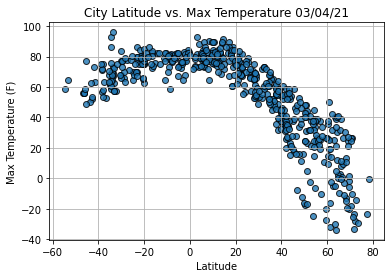

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

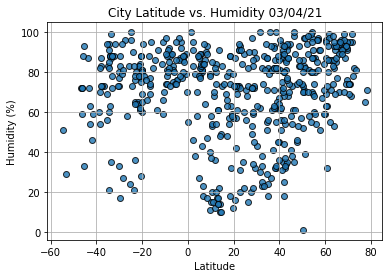

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

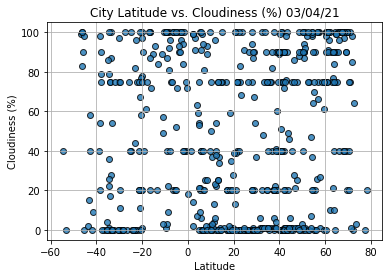

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

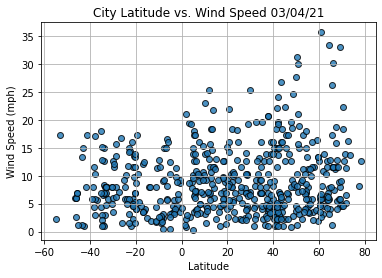

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [37]:
#create new dataframe using loc 
index13 = city_data_df.loc[13]
index13

City                    Cape Town
Country                        ZA
Date          2021-03-04 20:38:54
Lat                      -33.9258
Lng                       18.4232
Max Temp                    66.99
Humidity                       63
Cloudiness                      0
Wind Speed                  12.66
Name: 13, dtype: object

In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Sharjah,AE,2021-03-04 20:42:55,25.3573,55.4033,78.80,56,0,2.30
5,Tuktoyaktuk,CA,2021-03-04 20:42:56,69.4541,-133.0374,-20.20,76,20,8.05
6,Yellowknife,CA,2021-03-04 20:42:56,62.4560,-114.3525,-5.01,71,90,13.80
7,Fortuna,US,2021-03-04 20:42:56,40.5982,-124.1573,61.00,51,51,8.99
8,Grong,NO,2021-03-04 20:42:57,64.4654,12.3149,30.20,93,75,5.75


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

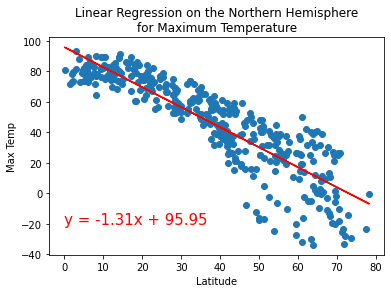

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title('Linear Regression on the Northern Hemisphere\nfor Maximum Temperature')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-20))

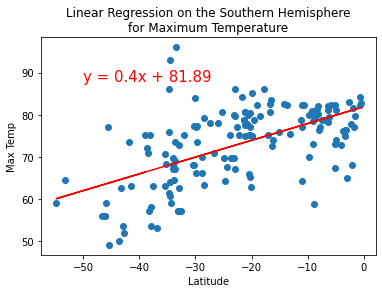

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title('Linear Regression on the Southern Hemisphere\nfor Maximum Temperature')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,88))